# Ejemplo - Regresión lineal

Se incluyen todas las variables para poder probar los algoritmos que seleccionan o aprenden pesos para los atributos. Sin embargo, no se incluyeron atributos claramente no relacionados; se seleccionaron los atributos si había alguna conexión plausible con el crimen (N = 122), más el atributo que se predijo (Crímenes violentos per cápita). Las variables incluidas en el conjunto de datos involucran a la comunidad, como el porcentaje de la población considerada urbana y el ingreso familiar medio, e involucran a las fuerzas del orden público, como el número per cápita de agentes de policía y el porcentaje de agentes asignados a las unidades de drogas.

La variable de delitos violentos per cápita se calculó utilizando la población y la suma de las variables delictivas consideradas delitos violentos en los Estados Unidos: asesinato, violación, robo y asalto. Al parecer, hubo cierta controversia en algunos estados con respecto al recuento de violaciones. Estos resultaron en valores perdidos para la violación, lo que resultó en valores incorrectos para los delitos violentos per cápita. Estas ciudades no están incluidas en el conjunto de datos. Muchas de estas comunidades omitidas eran del medio oeste de Estados Unidos.

Los datos se describen a continuación en función de los valores originales. Todos los datos numéricos se normalizaron en el rango decimal 0,00-1,00 utilizando un método de agrupación de intervalos iguales no supervisado. Los atributos conservan su distribución y sesgo (de ahí que, por ejemplo, el atributo de población tenga un valor medio de 0,06 porque la mayoría de las comunidades son pequeñas). P.ej. Un atributo descrito como "media de personas por hogar" es en realidad la versión normalizada (0-1) de ese valor.


La normalización conserva proporciones aproximadas de valores DENTRO de un atributo (p. Ej., El doble del valor para el doble de la población dentro de la precisión disponible, excepto para los valores extremos (todos los valores más de 3 DE por encima de la media se normalizan a 1,00; todos los valores de más de 3 DE por debajo de la media está nromalizada a 0,00)).

Sin embargo, la normalización no preserva las relaciones entre los valores ENTRE atributos (por ejemplo, no sería significativo comparar el valor de whitePerCap con el valor de blackPerCap para una comunidad)

Una limitación fue que la encuesta LEMAS fue de los departamentos de policía con al menos 100 oficiales, más una muestra aleatoria de departamentos más pequeños. Para nuestros propósitos, se omitieron las comunidades que no se encuentran en los conjuntos de datos del censo y del crimen. A muchas comunidades les faltan datos de LEMAS.


## Descripción del dataset

|#|Nombre variable|Descripción|Tipo|
|-----|-------|------|------|
|#|"state"|Estado de EE. UU. (Por número"): no se cuenta como predictivo anterior, pero si se considera, se debe considerar nominal |(nominal)|
|#|"county"|código numérico para el condado - no predictivo y muchos valores perdidos |(numérico)|
|#|"community"|código numérico para la comunidad - no predictivo y muchos valores perdidos |(numérico)|
|#|"communityname"|nombre de la comunidad - no predictivo - solo para información |(cadena)|
|#|"fold"|número de veces para validación cruzada de 10 veces no aleatoria, potencialmente útil para depurar, pruebas emparejadas - no predictivo |(numérico)|
|#|"population"|población de la comunidad |(numérico - decimal)|
|#|"householdsize"|promedio de personas por hogar |(numérico - decimal)|
|#|"racepctblack"|porcentaje de población afroamericana |(numérico - decimal)|
|#|"racePctWhite"|porcentaje de población que es caucásica |(numérico - decimal)|
|#|"racePctAsian"|porcentaje de la población que es de herencia asiática |(numérico - decimal)|
|#|"racePctHisp"|porcentaje de la población de ascendencia hispana |(numérico - decimal)|
|#|"agePct12t21"|porcentaje de población que tiene entre 12 y 21 años de edad |(numérico - decimal)|
|#|"agePct12t29"|porcentaje de la población que tiene entre 12 y 29 años de edad |(numérico - decimal)|
|#|"agePct16t24"|porcentaje de la población que tiene entre 16 y 24 años de edad |(numérico - decimal)|
|#|"agePct65up"|porcentaje de la población de 65 años o más |(numérico - decimal)|
|#|"numbUrban"|número de personas que viven en áreas clasificadas como urbanas |(numérico - decimal)|
|#|"pctUrban"|porcentaje de personas que viven en áreas clasificadas como urbanas |(numérico - decimal)|
|#|"medIncome"|ingreso familiar medio |(numérico - decimal)|
|#|"pctWWage"|porcentaje de hogares con ingresos salariales o salariales en 1989 |(numérico - decimal)|
|#|"pctWFarmSelf"|porcentaje de hogares con ingresos agrícolas o por cuenta propia en 1989 |(numérico - decimal)|
|#|"pctWInvInc"|porcentaje de hogares con ingresos por inversión / alquiler en 1989 |(numérico - decimal)|
|#|"pctWSocSec"|porcentaje de hogares con ingresos de la seguridad social en 1989 |(numérico - decimal)|
|#|"pctWPubAsst"|porcentaje de hogares con ingresos por asistencia pública en 1989 |(numérico - decimal)|
|#|"pctWRetire"|porcentaje de hogares con ingresos por jubilación en 1989 |(numérico - decimal)|
|#|"medFamInc"|ingreso familiar mediano (difiere del ingreso familiar para hogares no familiares) |(numérico - decimal)|
|#|"perCapInc"|ingreso per cápita |(numérico - decimal)|
|#|"whitePerCap"|ingreso per cápita para los caucásicos |(numérico - decimal)|
|#|"blackPerCap"|ingreso per cápita para afroamericanos |(numérico - decimal)|
|#|"indianPerCap"|ingreso per cápita de los nativos americanos |(numérico - decimal)|
|#|"AsianPerCap"|ingreso per cápita para personas con ascendencia asiática |(numérico - decimal)|
|#|"OtherPerCap"|ingreso per cápita para personas con 'otra' herencia |(numérico - decimal)|
|#|"HispPerCap"|ingreso per cápita para personas con ascendencia hispana |(numérico - decimal)|
|#|"NumUnderPov"|número de personas por debajo del nivel de pobreza |(numérico - decimal)|
|#|"PctPopUnderPov"|porcentaje de personas por debajo del nivel de pobreza |(numérico - decimal)|
|#|"PctLess9thGrade"|porcentaje de personas de 25 años o más con menos de 9 ° grado de educación |(numérico - decimal)|
|#|"PctNotHSGrad"|porcentaje de personas de 25 años o más que no se han graduado de la escuela secundaria |(numérico - decimal)|
|#|"PctBSorMore"|porcentaje de personas de 25 años o más con una licenciatura o educación superior |(numérico - decimal)|
|#|"PctUnemployed"|porcentaje de personas de 16 años o más, en la población activa y desempleados |(numérico - decimal)|
|#|"PctEmploy"|porcentaje de personas de 16 años o más que están empleadas |(numérico - decimal)|
|#|"PctEmplManu"|porcentaje de personas de 16 años o más que están empleadas en la industria manufacturera |(numérico - decimal)|
|#|"PctEmplProfServ"|porcentaje de personas mayores de 16 años que están empleadas en servicios profesionales |(numérico - decimal)|
|#|"PctOccupManu"|porcentaje de personas de 16 años o más que están empleadas en la industria manufacturera |(numérico - decimal)|
|#|"PctOccupMgmtProf"|porcentaje de personas de 16 años o más que están empleadas en ocupaciones de gestión o profesionales |(numérico - decimal)|
|#|"MalePctDivorce"|porcentaje de hombres divorciados |(numérico - decimal)|
|#|"MalePctNevMarr"|porcentaje de hombres que nunca se han casado |(numérico - decimal)|
|#|"FemalePctDiv"|porcentaje de mujeres divorciadas |(numérico - decimal)|
|#|"TotalPctDiv"|porcentaje de población divorciada |(numérico - decimal)|
|#|"PersPerFam"|número medio de personas por familia |(numérico - decimal)|
|#|"PctFam2Par"|porcentaje de familias |(con niños) encabezadas por dos padres |(numérico - decimal)|
|#|"PctKids2Par"|porcentaje de niños en viviendas familiares con dos padres |(numérico - decimal)|
|#|"PctYoungKids2Par"|porcentaje de niños menores de 4 años en hogares con dos padres |(numérico - decimal)|
|#|"PctTeen2Par"|porcentaje de niños de 12 a 17 años en hogares con dos padres |(numérico - decimal)|
|#|"PctWorkMomYoungKids"|porcentaje de madres de niños menores de 6 años en la fuerza laboral |(numérico - decimal)|
|#|"PctWorkMom"|porcentaje de madres de niños menores de 18 años en la fuerza laboral |(numérico - decimal)|
|#|"NumIlleg"|número de hijos nacidos para nunca casarse |(numérico - decimal)|
|#|"PctIlleg"|porcentaje de niños nacidos para nunca casarse |(numérico - decimal)|
|#|"NumImmig"|número total de personas que se sabe que han nacido en el extranjero |(numérico - decimal)|
|#|"PctImmigRecent"|porcentaje de _inmigrantes_ que emigraron en los últimos 3 años |(numérico - decimal)|
|#|"PctImmigRec5"|porcentaje de _inmigrantes_ que emigraron en los últimos 5 años |(numérico - decimal)|
|#|"PctImmigRec8"|porcentaje de _inmigrantes_ que emigraron en los últimos 8 años |(numérico - decimal)|
|#|"PctImmigRec10"|porcentaje de _inmigrantes_ que emigraron en los últimos 10 años |(numérico - decimal)|
|#|"PctRecentImmig"|porcentaje de _población_ que ha inmigrado en los últimos 3 años |(numérico - decimal)|
|#|"PctRecImmig5"|porcentaje de _población_ que ha inmigrado en los últimos 5 años |(numérico - decimal)|
|#|"PctRecImmig8"|porcentaje de _población_ que ha inmigrado en los últimos 8 años |(numérico - decimal)|
|#|"PctRecImmig10"|porcentaje de _población_ que ha inmigrado en los últimos 10 años |(numérico - decimal)|
|#|"PctSpeakEnglOnly"|porcentaje de personas que solo hablan inglés |(numérico - decimal)|
|#|"PctNotSpeakEnglWell"|porcentaje de personas que no hablan bien inglés |(numérico - decimal)|
|#|"PctLargHouseFam"|porcentaje de hogares familiares que son grandes (6 o más) |(numérico - decimal)|
|#|"PctLargHouseOccup"|porcentaje de todos los hogares ocupados que son grandes (6 o más personas) |(numérico - decimal)|
|#|"PersPerOccupHous"|media de personas por hogar |(numérico - decimal)|
|#|"PersPerOwnOccHous"|promedio de personas por hogar ocupado por el propietario |(numérico - decimal)|
|#|"PersPerRentOccHous"|promedio de personas por hogar de alquiler |(numérico - decimal)|
|#|"PctPersOwnOccup"|porcentaje de personas en hogares ocupados por propietarios |(numérico - decimal)|
|#|"PctPersDenseHous"|porcentaje de personas en viviendas densas (más de 1 persona por habitación) |(numérico - decimal)|
|#|"PctHousLess3BR"|porcentaje de unidades de vivienda con menos de 3 dormitorios |(numérico - decimal)|
|#|"MedNumBR"|número medio de dormitorios |(numérico - decimal)|
|#|"HousVacant"|número de hogares vacantes |(numérico - decimal)|
|#|"PctHousOccup"|porcentaje de vivienda ocupada |(numérico - decimal)|
|#|"PctHousOwnOcc"|porcentaje de hogares ocupados por el propietario |(numérico - decimal)|
|#|"PctVacantBoarded"|porcentaje de vivienda desocupada que está tapiada |(numérico - decimal)|
|#|"PctVacMore6Mos"|porcentaje de viviendas desocupadas que han estado desocupadas más de 6 meses |(numérico - decimal)|
|#|"MedYrHousBuilt"|año medio de unidades de vivienda construidas |(numérico - decimal)|
|#|"PctHousNoPhone"|porcentaje de unidades de vivienda ocupadas sin teléfono (en 1990, ¡esto era raro!) |(numérico - decimal)|
|#|"PctWOFullPlumb"|porcentaje de viviendas sin instalaciones de plomería completas |(numérico - decimal)|
|#|"OwnOccLowQuart"|Vivienda ocupada por el propietario - valor del cuartil inferior |(numérico - decimal)|
|#|"OwnOccMedVal"|Vivienda ocupada por el propietario - valor mediano |(numérico - decimal)|
|#|"OwnOccHiQuart"|vivienda ocupada por el propietario - valor del cuartil superior |(numérico - decimal)|
|#|"RentLowQ"|vivienda de alquiler - alquiler del cuartil inferior |(numérico - decimal)|
|#|"RentMedian"|vivienda de alquiler - renta mediana (variable del censo H32B del archivo STF1A) |(numérico - decimal)|
|#|"RentHighQ"|vivienda de alquiler - alquiler del cuartil superior |(numérico - decimal)|
|#|"MedRent"|renta bruta mediana (Censo variable H43A del archivo STF3A - incluye servicios públicos) |(numérico - decimal)|
|#|"MedRentPctHousInc"|renta bruta mediana como porcentaje del ingreso familiar |(numérico - decimal)|
|#|"MedOwnCostPctInc"|costo promedio de los propietarios como porcentaje de los ingresos del hogar - para propietarios con una hipoteca |(numérico - decimal)|
|#|"MedOwnCostPctIncNoMtg"|costo promedio de los propietarios como porcentaje de los ingresos del hogar - para propietarios sin una hipoteca |(numérico - decimal)|
|#|"NumInShelters"|número de personas en refugios para personas sin hogar |(numérico - decimal)|
|#|"NumStreet"|número de personas sin hogar contadas en la calle |(numérico - decimal)|
|#|"PctForeignBorn"|porcentaje de personas nacidas en el extranjero |(numérico - decimal)|
|#|"PctBornSameState"|porcentaje de personas nacidas en el mismo estado en el que viven actualmente |(numérico - decimal)|
|#|"PctSameHouse85"|porcentaje de personas que viven en la misma casa que en 1985 (5 años antes) |(numérico - decimal)|
|#|"PctSameCity85"|porcentaje de personas que viven en la misma ciudad que en 1985 (5 años antes) |(numérico - decimal)|
|#|"PctSameState85"|porcentaje de personas que viven en el mismo estado que en 1985 (5 años antes) |(numérico - decimal)|
|#|"LemasSwornFT"|número de policías juramentados a tiempo completo |(numérico - decimal)|
|#|"LemasSwFTPerPop"|policías juramentados a tiempo completo por cada 100.000 habitantes |(numérico - decimal)|
|#|"LemasSwFTFieldOps"|número de agentes de policía juramentados a tiempo completo en operaciones de campo (en la calle en lugar de administrativos, etc.) |(numérico - decimal)|
|#|"LemasSwFTFieldPerPop"|Oficiales de policía juramentados a tiempo completo en operaciones de campo (en la calle en lugar de administrativos, etc.) por cada 100.000 habitantes |(numérico - decimal)|
|#|"LemasTotalReq"|solicitudes totales de policía |(numérico - decimal)|
|#|"LemasTotReqPerPop"|solicitudes totales de policía por cada 100.000 habitantes |(numérico - decimal)|
|#|"PolicReqPerOffic"|solicitudes totales de policía por agente de policía |(numérico - decimal)|
|#|"PolicPerPop"|agentes de policía por cada 100.000 habitantes |(numérico - decimal)|
|#|"RacialMatchCommPol"|una medida del emparejamiento racial entre la comunidad y la fuerza policial. Los valores altos indican que las proporciones en la comunidad y la fuerza policial son similares |(numérico - decimal)|
|#|"PctPolicWhite"|porcentaje de policías caucásicos |(numérico - decimal)|
|#|"PctPolicBlack"|porcentaje de policías que son afroamericanos |(numérico - decimal)|
|#|"PctPolicHisp"|porcentaje de policías hispanos |(numérico - decimal)|
|#|"PctPolicAsian"|porcentaje de policías asiáticos |(numérico - decimal)|
|#|"PctPolicMinor"|porcentaje de policías que son minoría de cualquier tipo |(numérico - decimal)|
|#|"OfficAssgnDrugUnits"|número de oficiales asignados a unidades especiales de drogas |(numérico - decimal)|
|#|"NumKindsDrugsSeiz"|número de diferentes tipos de drogas incautadas |(numérico - decimal)|
|#|"PolicAveOTWorked"|promedio de horas extras trabajadas por la policía |(numérico - decimal)|
|#|"LandArea"|área de tierra en millas cuadradas |(numérico - decimal)|
|#|"PopDens"|densidad de población en personas por milla cuadrada |(numérico - decimal)|
|#|"PctUsePubTrans"|porcentaje de personas que utilizan el transporte público para desplazarse |(numérico - decimal)|
|#|"PolicCars"|número de coches de policía |(numérico - decimal)|
|#|"PolicOperBudg"|presupuesto operativo de la policía |(numérico - decimal)|
|#|"LemasPctPolicOnPatr"|porcentaje de policías juramentados a tiempo completo en patrulla |(numérico - decimal)|
|#|"LemasGangUnitDeploy"|unidad de pandillas desplegada |(numérico - decimal - pero realmente ordinal - 0 significa NO, 1 significa SÍ, 0.5 significa tiempo parcial)|
|#|"LemasPctOfficDrugUn"|porcentaje de oficiales asignados a unidades de drogas |(numérico - decimal)|
|#|"PolicBudgPerPop"|presupuesto operativo policial por población |(numérico - decimal)|
|#|"ViolentCrimesPerPop"|número total de delitos violentos por cada 100.000 habitantes |(numérico - decimal) Atributo OBJETIVO |(por predecir)|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean


In [2]:
df = pd.read_csv('../data/communities.csv')
df.head()


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,Unnamed: 128
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,NaN
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.12,0.45,?,?,?,?,0.00,?,0.67,NaN
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.21,0.02,?,?,?,?,0.00,?,0.43,NaN
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.39,0.28,?,?,?,?,0.00,?,0.12,NaN
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.09,0.02,?,?,?,?,0.00,?,0.03,NaN


In [3]:
print(df.shape)
# existen 1994 comunidades.
#df['PolicCars'].value_counts() tiene 1675 datos NaN (?) no puede entrar
#df['PctUsePubTrans'].value_counts()

(1994, 129)


In [4]:
df1 = df.drop(['Unnamed: 128'], axis=1)
df1.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

# Limpieza de los datos

In [7]:
# conversion de datos con cadena '?' a NaN. 
df1.replace(to_replace = '?', value = np.NaN, inplace = True)
# contabilizamos el porcentaje de NaN
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

# se obsevan datos completos (cero NaN)
df_vars = missing_data[missing_data['Percent']==0]
nombres = df_vars.index.tolist()
nombres = np.sort(nombres)
print(nombres)
nombres[0:2]
# Todo con fin de ver la variable dependiente "y" y tambien las variables independientes


                   Total  Percent
LemasSwFTFieldOps   1675  0.84002
PctPolicAsian       1675  0.84002
PolicBudgPerPop     1675  0.84002
LemasSwornFT        1675  0.84002
LemasSwFTPerPop     1675  0.84002
...                  ...      ...
PctHousLess3BR         0  0.00000
MedNumBR               0  0.00000
HousVacant             0  0.00000
PctHousOccup           0  0.00000
state                  0  0.00000

[128 rows x 2 columns]
['AsianPerCap' 'FemalePctDiv' 'HispPerCap' 'HousVacant' 'LandArea'
 'LemasPctOfficDrugUn' 'MalePctDivorce' 'MalePctNevMarr' 'MedNumBR'
 'MedOwnCostPctInc' 'MedOwnCostPctIncNoMtg' 'MedRent' 'MedRentPctHousInc'
 'MedYrHousBuilt' 'NumIlleg' 'NumImmig' 'NumInShelters' 'NumStreet'
 'NumUnderPov' 'OwnOccHiQuart' 'OwnOccLowQuart' 'OwnOccMedVal'
 'PctBSorMore' 'PctBornSameState' 'PctEmplManu' 'PctEmplProfServ'
 'PctEmploy' 'PctFam2Par' 'PctForeignBorn' 'PctHousLess3BR'
 'PctHousNoPhone' 'PctHousOccup' 'PctHousOwnOcc' 'PctIlleg'
 'PctImmigRec10' 'PctImmigRec5' 'PctImmigR

array(['AsianPerCap', 'FemalePctDiv'], dtype='<U21')

**Gráfica de dispersión o correlograas de todas las variables**

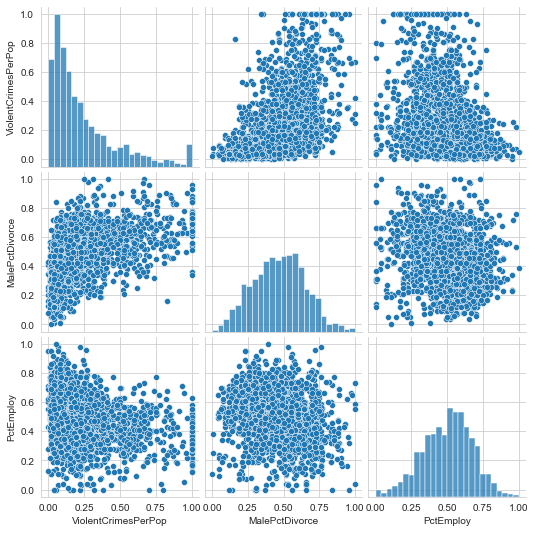

In [18]:
df1c = df1[['ViolentCrimesPerPop','MalePctDivorce','PctEmploy']]
sns.pairplot(df1c)
plt.show()

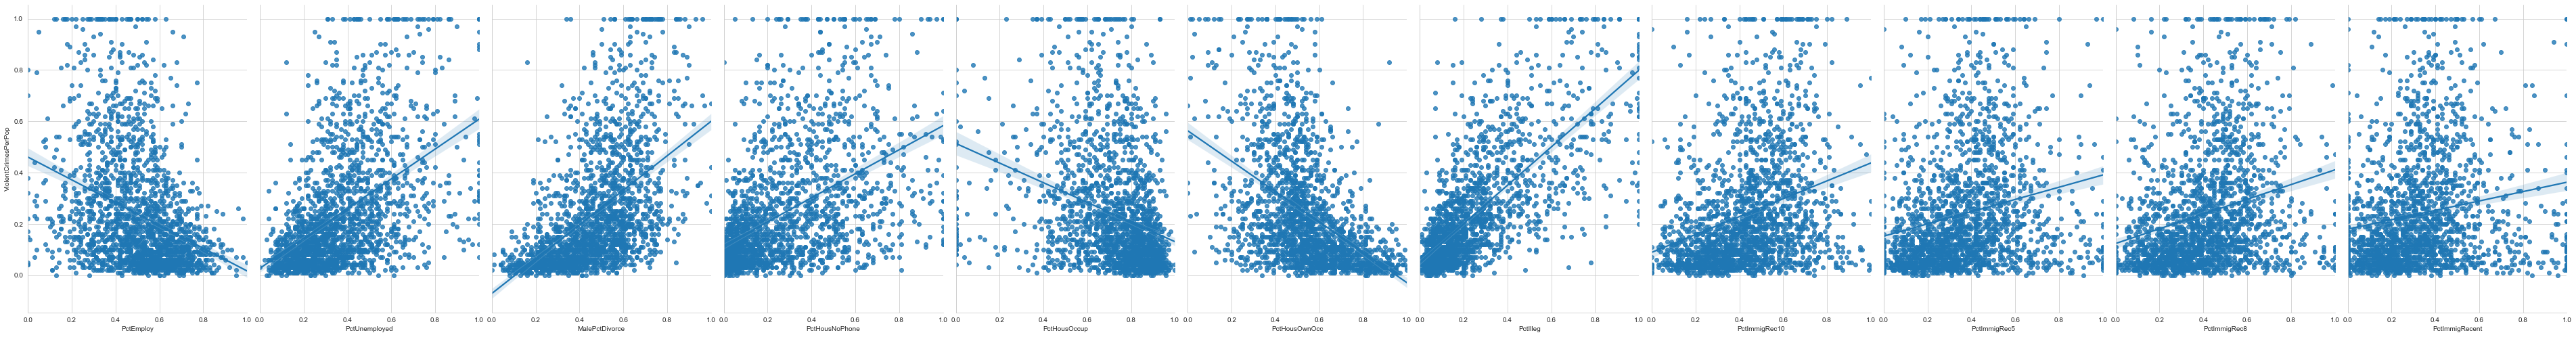

In [19]:
# se toman las variables en porcentaje de personas empleadas, no empleadas , etc. por comunidad  
# la variable dependiente es el número total de delitos violentos por cada 100.000 habitantes
nombres_varind = ['PctEmploy','PctUnemployed','MalePctDivorce','PctHousNoPhone','PctHousOccup','PctHousOwnOcc','PctIlleg',
 'PctImmigRec10','PctImmigRec5','PctImmigRec8','PctImmigRecent']
sns.pairplot(df1, x_vars=nombres_varind, y_vars='ViolentCrimesPerPop', size=7, aspect=0.7, kind='reg')


In [ ]:
X = df1[nombres_varind]
y = df1['ViolentCrimesPerPop']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
zip(nombres_varind, linreg.coef_)

In [ ]:
# predicción
y_pred = linreg.predict(X_test)

In [ ]:
# calculate MAE using scikit-learn
print('Error absoluto medio:', mean_absolute_error(y_test, y_pred))
# calculate MSE using scikit-learn
print('Error cuadratico medio:', mean_squared_error(y_test, y_pred))
# coef de determinacion
print('coeficiente de determinación: ',r2_score(y_test, y_pred))

In [ ]:
# ver si los residuos tienen distribucion normal

